In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
imgGray = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/2- 2D-scaling-Transformation/images/albert-einstein-gray.jpg', cv2.IMREAD_GRAYSCALE)

In [4]:
theta = 45
c_theta = np.cos(np.deg2rad(theta))
s_theta = np.cos(np.deg2rad(theta))
R = np.array([[c_theta, -s_theta], [s_theta, c_theta]])

rMax, cMax = imgGray.shape[0], imgGray.shape[1]
Cords = np.array([[0, 0], [0, cMax-1], [rMax-1, 0], [rMax-1, cMax-1]])
A_dash = R.dot(Cords.T)

mins = A_dash.min(axis=1)
maxs = A_dash.max(axis=1)
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))
maxR = np.int64(np.ceil(maxs[0]))
maxC = np.int64(np.ceil(maxs[1]))

H, W = maxR-minR+1, maxC-minC+1
I2 = np.zeros((H, W), dtype='uint8')

In [5]:
R.shape, Cords.shape, (Cords.T).shape, A_dash.shape

((2, 2), (4, 2), (2, 4), (2, 4))

In [6]:
mins[0]

-514.0666299226201

In [7]:
I2.shape

(1187, 1186)

In [8]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [9]:
import matplotlib as mpl
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    h, w = I.shape
    figSize = w/float(dpi), h/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(I, cmap='gray')
    plt.show

In [10]:
numRows = imgGray.shape[0]
numCols = imgGray.shape[1]
Rinv = np.linalg.inv(R)
for new_i in range(minR, maxR):
    for new_j in range(minC, maxC):
        P_dash = np.array([new_i, new_j])
        P = Rinv.dot(P_dash)
        i, j = P[0], P[1]
        if i<0 or i>=numRows or j<0 or j>=numCols:
            pass
        else:
            g = f_bilinearInterpolate(i, j, imgGray)
            I2[new_i-minR, new_j-minC] = g

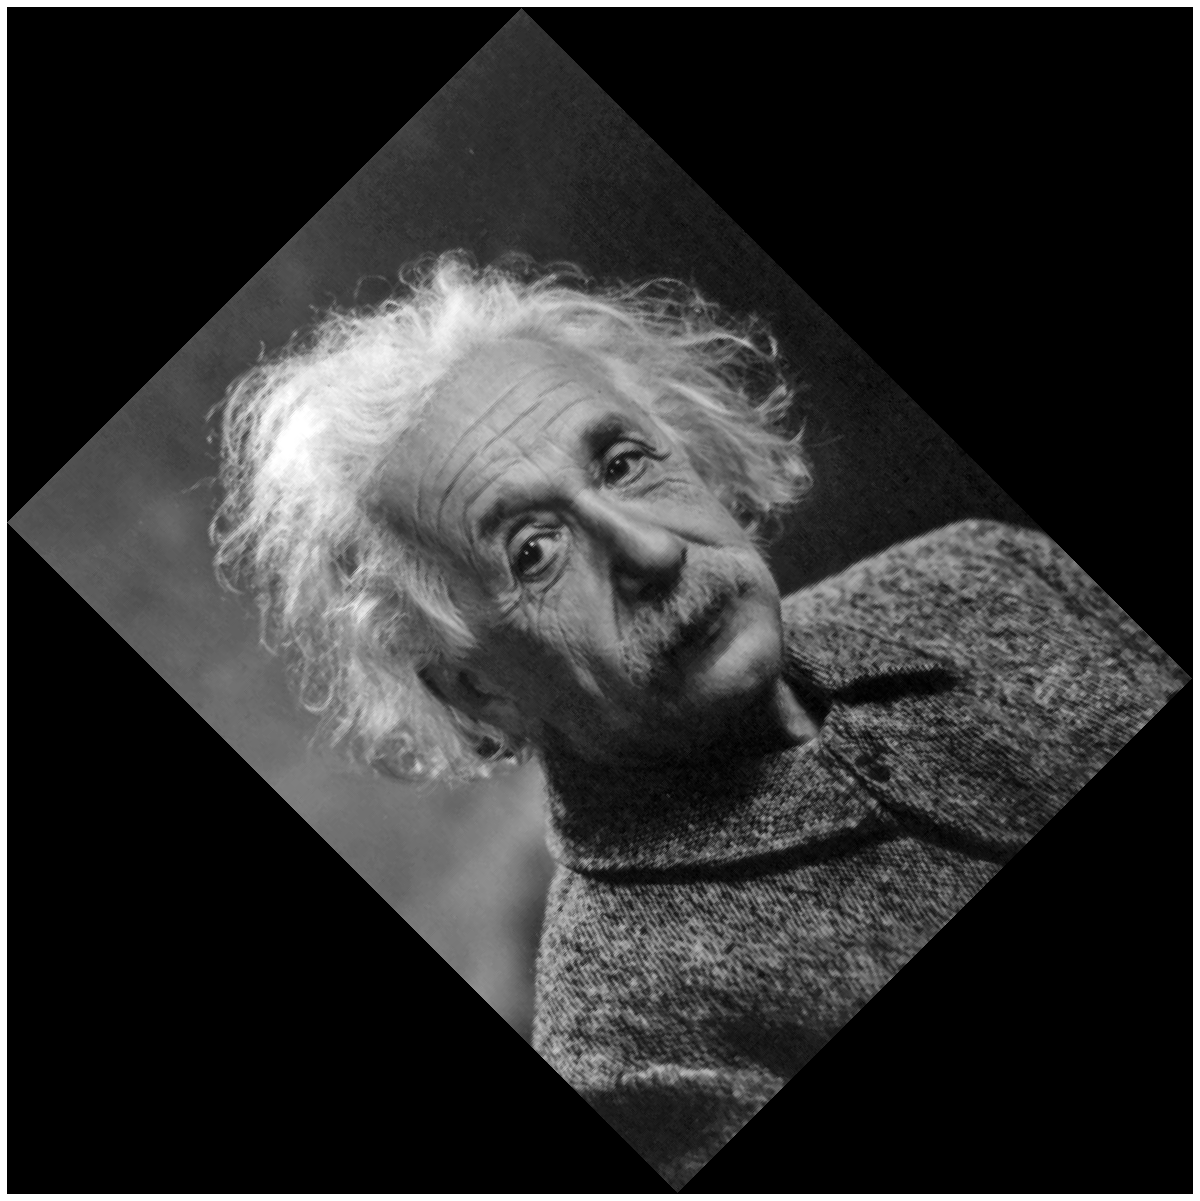

In [11]:
displayImageInActualSize(I2)

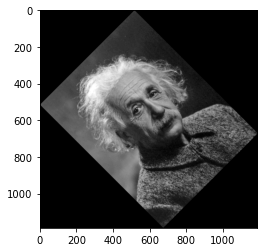

In [12]:
plt.imshow(I2, cmap='gray')

### Quiz 
Can you rotate image to
   * 180 degree in anti-clockwise(+)
   * 90 degree in clockwise(-)

In [64]:
theta = 180 # Enter the angle
c_theta = np.cos(np.deg2rad(theta))
s_theta = np.sin(np.deg2rad(theta))
R = np.array([[c_theta, -s_theta], [s_theta, c_theta]])

rMax, cMax = imgGray.shape[0], imgGray.shape[1]
Cords = np.array([[0, 0], [0, cMax-1], [rMax-1, 0], [rMax-1, cMax-1]])
A_dash = R.dot(Cords.T)

mins = A_dash.min(axis=1)
maxs = A_dash.max(axis=1)
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))
maxR = np.int64(np.ceil(maxs[0]))
maxC = np.int64(np.ceil(maxs[1]))

H, W = maxR-minR+1, maxC-minC+1
I2 = np.zeros((H, W), dtype='uint8')

In [65]:
Rinv = np.linalg.inv(R)
for new_i in range(minR, maxR):
    for new_j in range(minC, maxC):
        P_dash = np.array([new_i, new_j])
        P = Rinv.dot(P_dash)
        i, j = P[0], P[1]
        if i<0 or i>=numRows or j<0 or j>=numCols:
            pass
        else:
            g = f_bilinearInterpolate(i, j, imgGray)
            I2[new_i-minR, new_j-minC] = g

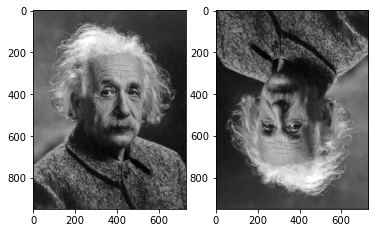

In [66]:
plt.subplot(121)
plt.imshow(imgGray, cmap='gray')
plt.subplot(122)
plt.imshow(I2, cmap='gray')

### Implement as good coding

In [69]:
def getExtents(R, rMax, cMax):
    
    Cords = np.array([[0, 0], [0, cMax-1], [rMax-1, 0], [rMax-1, cMax-1]])
    A_dash = R.dot(Cords.T)

    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))

    H, W = maxR-minR+1, maxC-minC+1
    
    return minR, minC, maxR, maxC, H, W

In [1]:
def transformImg(angle, I_gray):
    """
    Give the image you want to transform and its transforming angle value
    angle - angle value +(counter-clockwise)/ -(clockwise)
    I_gray - gray image you want to transform
    """
    
    c_theta = np.cos(np.deg2rad(angle))
    s_theta = np.sin(np.deg2rad(angle))
    R = np.array([[c_theta, -s_theta], [s_theta, c_theta]])
    
    rMax, cMax = I_gray.shape[0], I_gray.shape[1]
    
    minR, minC, maxR, maxC, H, W = getExtents(R, rMax, cMax)
    
    I2 = np.zeros((H, W), dtype='uint8')
    
    Rinv = np.linalg.inv(R)
    
    for new_i in range(minR, maxR):
        for new_j in range(minC, maxC):
            P_dash = np.array([new_i, new_j])
            P = Rinv.dot(P_dash)
            i, j = P[0], P[1]
            if i<0 or i>=numRows or j<0 or j>=numCols:
                pass
            else:
                g = f_bilinearInterpolate(i, j, I_gray)
                I2[new_i-minR, new_j-minC] = g
                
    return plt.imshow(I2, cmap='gray')

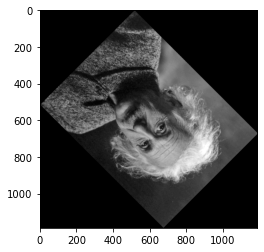

In [93]:
I3 = transformImg(-135, imgGray)

## Image Rotation with OpenCV

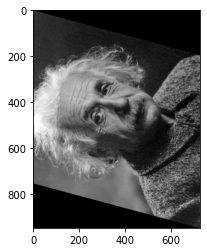

In [111]:
image = imgGray
rotation_pt = tuple(np.array(image.shape[1::-1]) / 2)
angle = 75
scale = 1
rotation_mat = cv2.getRotationMatrix2D(rotation_pt, angle, scale)
img = cv2.warpAffine(image, rotation_mat, image.shape[::-1])
plt.imshow(img, cmap='gray')